# Importing Depandancies

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Feature Engineering

In [35]:
df =pd.read_csv("Netflix_Stock_Price.csv")

In [36]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [37]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [39]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [40]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [41]:
df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
549,2020-04-13,371.309998,400.510010,367.700012,396.720001,396.720001,11692900
992,2022-01-12,544.270020,544.270020,532.020020,537.219971,537.219971,3787400
366,2019-07-22,312.000000,314.540009,305.809998,310.619995,310.619995,17718000
721,2020-12-15,518.500000,524.700012,513.559998,519.780029,519.780029,3394900
676,2020-10-12,548.809998,551.809998,538.239990,539.809998,539.809998,5391100


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [43]:
del df["Date"]


In [44]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


# Independent and Dependent Features

In [45]:
X=df.iloc[:,:-1]  #Independent
y=df.iloc[:,-1]   #Dependent

# Using Train Test Split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=10)

In [47]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((676, 5), (676,), (333, 5), (333,))

# Doing Standarization

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [49]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [50]:
X_train

array([[-0.66103459, -0.60185065, -0.61464748, -0.56275079, -0.56275079],
       [-1.47213646, -1.43472307, -1.42427548, -1.42322809, -1.42322809],
       [-0.47492138, -0.46395125, -0.48540844, -0.50120808, -0.50120808],
       ...,
       [ 0.90713959,  0.91615808,  0.93235888,  0.91371588,  0.91371588],
       [-0.65626716, -0.71107544, -0.68812145, -0.70220427, -0.70220427],
       [-0.51390123, -0.5455215 , -0.4917198 , -0.49756027, -0.49756027]])

In [51]:
X_test

array([[ 0.97949088,  1.14982629,  1.03936715,  1.17419767,  1.17419767],
       [ 1.15962169,  1.21562057,  1.20006814,  1.21581812,  1.21581812],
       [-1.09317966, -1.07865276, -1.04117394, -1.05696402, -1.05696402],
       ...,
       [-0.74740747, -0.70977612, -0.69264303, -0.66030266, -0.66030266],
       [ 0.75364985,  0.74809867,  0.77504887,  0.79137859,  0.79137859],
       [-1.2079697 , -1.21098445, -1.16824634, -1.18407145, -1.18407145]])

# Using Regression

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
regression = LinearRegression()

In [54]:
regression.fit(X_train,y_train)

LinearRegression()

In [55]:
regression.intercept_

np.float64(7642940.680473374)

In [56]:
regression.coef_

array([  6386668.10185864,  38368374.30953717, -59264428.21516261,
         6103560.77676816,   6103560.77676847])

In [57]:
y_pred = regression.predict(X_test)

In [58]:
y_test

891    7497300
753    3767600
452    5111800
667    3541500
353    3625000
        ...   
716    4229000
486    4718300
254    7561400
609    5691700
444    4509000
Name: Volume, Length: 333, dtype: int64

In [59]:
y_pred

array([10751663.49012305,  5410732.32630021,  8077102.46979302,
        4210574.60754616,  5940758.50243428,  9608309.35757443,
        8587366.16105609,  9029745.02606877,   -64844.65063313,
        2869876.54791073,  8215953.83504587,  2597796.89548883,
        4284651.26686823,  5089359.6358472 ,  9433688.96438347,
        2516357.21145167,  5135869.83830329,  7286249.37308513,
        4873994.30802318,  5101871.59118253,  1808499.06511606,
        4870858.67511929, 11459576.51647885,  -512876.65463119,
       13571617.9052123 ,  2945462.32944514,  2656599.52117635,
        1924345.99840633, 17631848.49786314,  8281421.1783347 ,
        7904374.31500731,  8325463.01976625, 14301608.27772382,
        8318319.59322543,  9391744.20628368,  9420412.63286585,
        2606710.37449911,  6491590.0815933 ,  8753301.39858561,
        2746819.77409622,  9897427.31626485,  2144706.56263078,
       14624409.80345429, 14054789.62346722,  6686958.56595184,
       13488914.64185078,  5324421.53599

# Checking the Performance of the model

In [60]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

11495703203313.873
2372811.5127807227
3390531.404265985


Text(0, 0.5, 'Test Predicted Data')

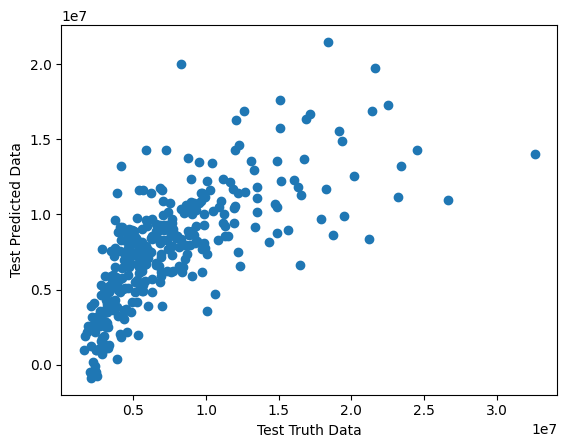

In [61]:
plt.scatter(y_test,y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [62]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.508044900609345


In [63]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5005226513831882

In [64]:
residuals=y_test-y_pred

In [65]:
residuals

891   -3.254363e+06
753   -1.643132e+06
452   -2.965302e+06
667   -6.690746e+05
353   -2.315759e+06
           ...     
716   -2.221476e+06
486   -4.348079e+06
254   -1.063840e+06
609    8.044916e+05
444   -3.736882e+06
Name: Volume, Length: 333, dtype: float64

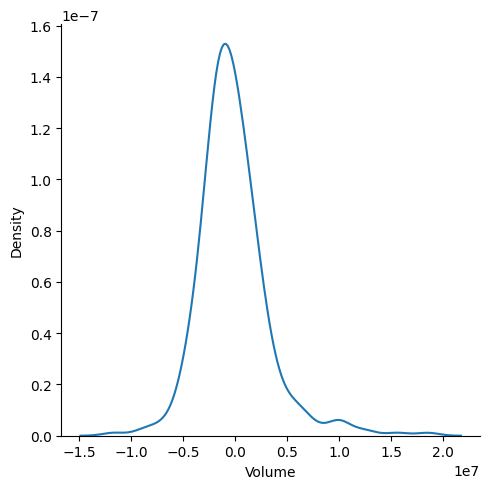

In [66]:
sns.displot(residuals,kind="kde")

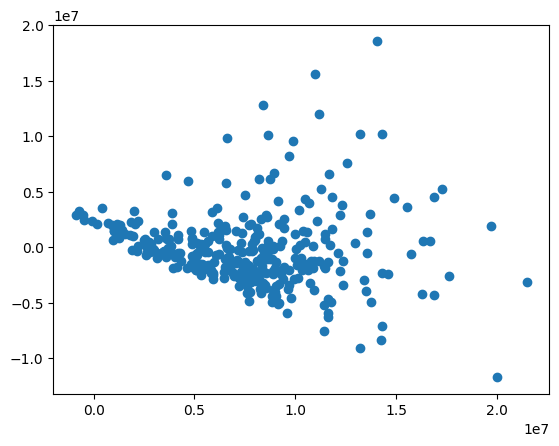

In [67]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(y_pred,residuals)

In [68]:
regression

LinearRegression()

# Export the model in Pickel file

In [69]:
import pickle
pickle.dump(regression,open('model.pkl','wb'))           